### James Griffin 
#### CS 501 R 
##### First Lab simulating SIR model 


In [36]:
## Importing packages 
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random

Setting a population parameter which follows a normal distribution with a mean of 10000 and standard deviation of 1500,

In [78]:
# The SIR model differential equations.
def sir_model(sim, t, N, beta, gamma):
    ''' function takes into a simulation state, a time, number of people and 
    then parameters for beta and gamma as defined in class '''
    S, I, R = sim
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - (gamma*I)
    dRdt = (gamma*I)

    return dSdt, dIdt, dRdt

In [109]:
#So we will build a function for simulating the model 
def sim_model():
    #number of people suceptable will be random 
    suceptable = np.random.normal(loc = 5000, scale = 1500, size = 5)
    #and we will start with a pre set number of people infected 
    inf = np.random.normal(loc = 100, scale = 20, size = 1)
    #and we start with a recovered population of 0 
    recov = 0
    #modeling the first year 
    days = range(0,365)

    #creating a number of contacts each person comes in contact with while sick
    contacts = np.arange(5,  55, 10)
    #and infection probabilities for each of those interactions 
    inf_prob = [.001, .05, .1, .5]
    #and the recovery rate will be the same 
    recov_rate = [.001, .05, .1, .5]

    for i in range(10):
        S = random.choice(suceptable)
        #print(S0)
        I = inf
        R = recov
        N = S+I+R
        #print(N)
        beta =  random.choice(contacts)*random.choice(inf_prob)
        gamma = random.choice(recov_rate)
        #print([S,I,R])
        ret = odeint(sir_model, [S,I,R], days, args = (N, beta,  gamma))
        S_, I_, R_ = ret.T

        #making plots all nice 
        textstr = 'sir model  simulation'+ "\n"
        textstr += "S: "+str(S)+'\n'
        textstr += "I: "+str(I)+'\n'
        textstr += "R: "+str(R)+'\n'
        textstr += "N: "+str(N)+'\n'
        textstr += "Gamma: "+str(gamma)+'\n'
        textstr += 'Beta: '+str(beta)+'\n'
        textstr += "R0: "+str(beta/gamma)+'\n'

        results = pd.DataFrame( 
            {'S': S_,
            'I': I_,
            'R': R_,
            'Days':days
            })
        print("here2")
        results.plot(x ='Days', y = ['S', "I", "R"], kind = 'area', 
                     stacked = False)
        
        plt.title("SIR Model")
        plt.text(1, 0.1, textstr, fontsize = 12,
                 transform=plt.gcf().transFigure)
        plt.show()

here2


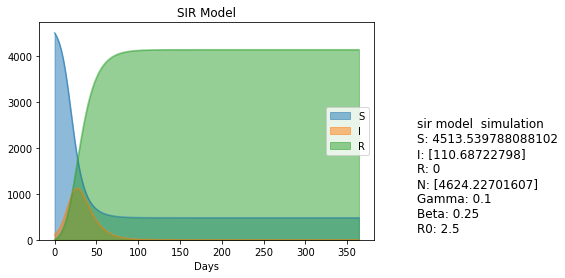

here2


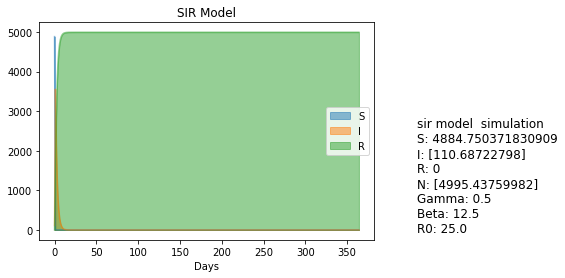

here2


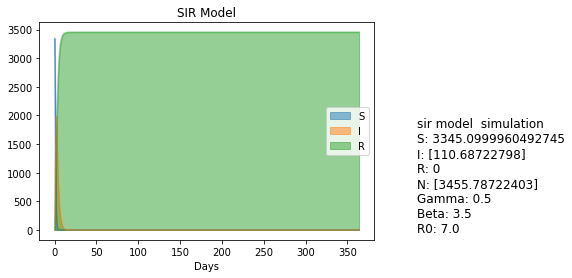

here2


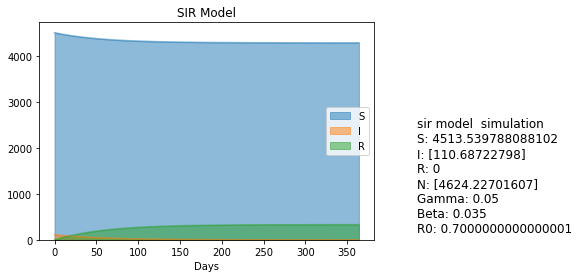

here2


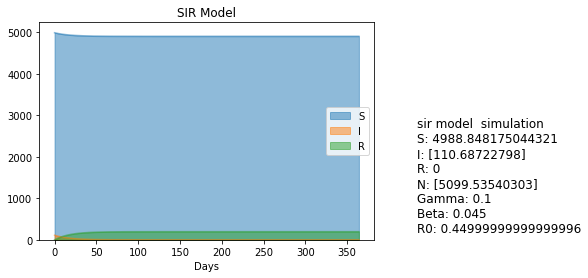

here2


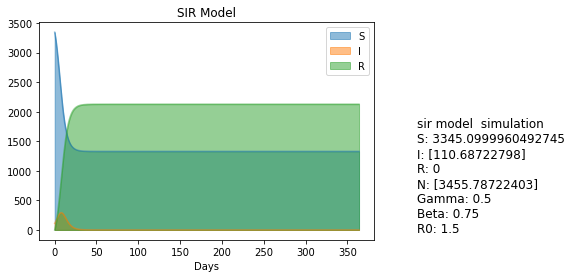

here2


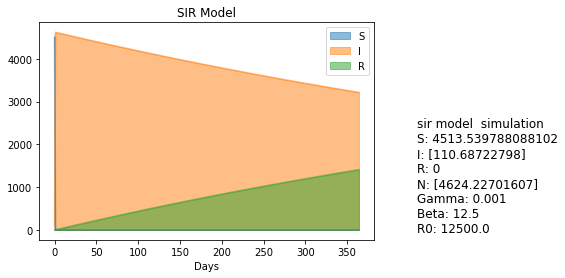

here2


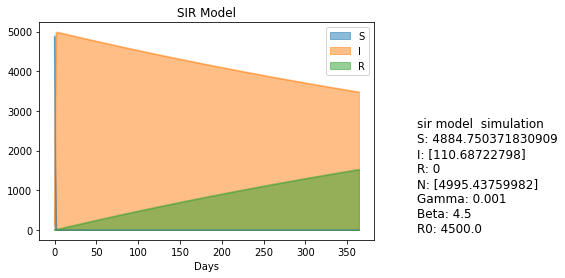

here2


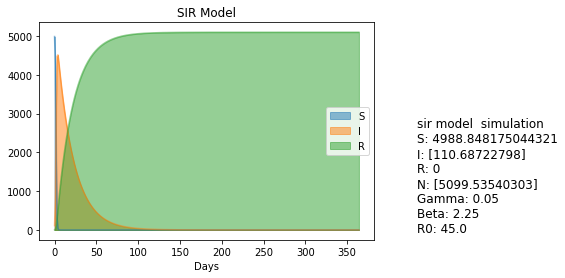

here2


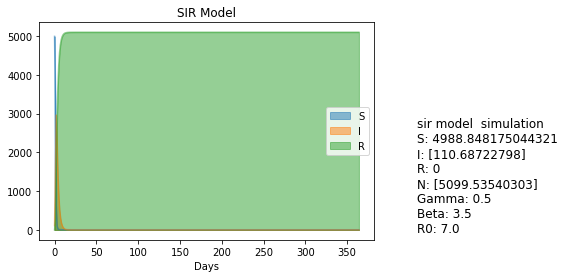

In [110]:
sim_model()


Ok so looking at the plots, it appears that gamma has a very large effect on the outcomes of this model. The graphs  that are very blue, have small betas and higher gammas, this results in a R0 that is really small. So this means that this means that while everyone is still susceptable, not very many people get sick. The opposite is true for the mostly tan graphs, here intead of a small R0 it is much larger, so people are not recovering very quickly. 

The mostly green graphs are most people who get it, recover rather quickly, this is obviously ideal. R0 had the range from about 3 to 25. The weird looking linear graphs are both have gamma's of .001, and similar poopulations in terms of suceptability and size. But for these, the R0 is humongous. 